<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/Pengolahan_Citra_Digital_%7C_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Ari Kun.jpg to Ari Kun.jpg
File yang diupload: Ari Kun.jpg


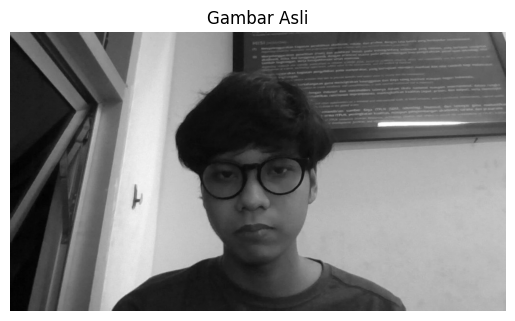

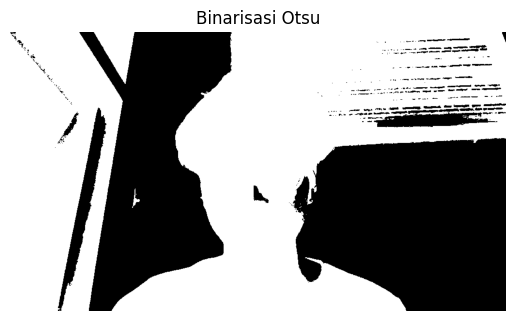

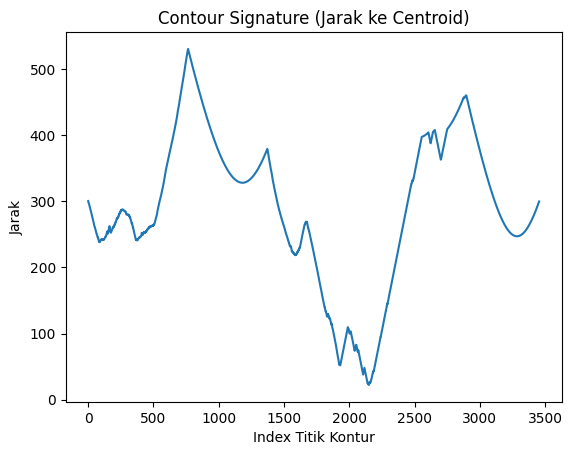

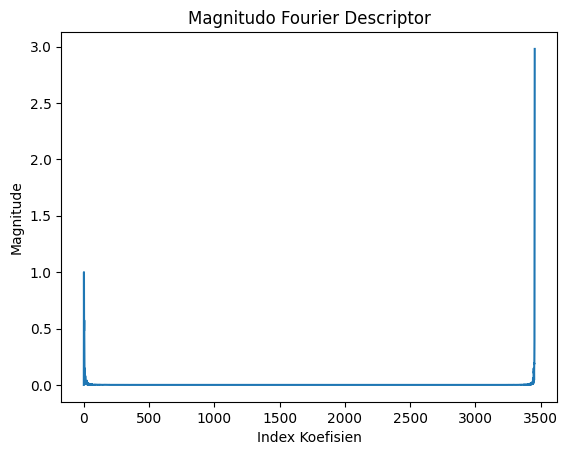

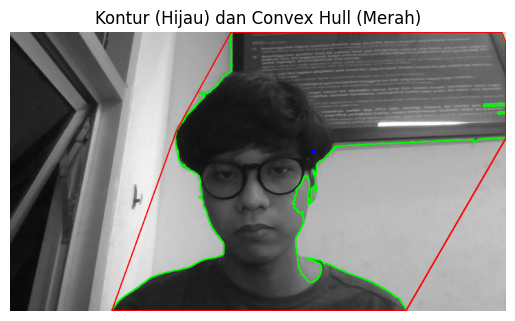

===== HASIL PERHITUNGAN FITUR BENTUK =====
Circularity      : 2.5499
Solidity         : 0.6479
Convexity        : 0.6420


In [1]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

filename = list(uploaded.keys())[0]
print("File yang diupload:", filename)

# Load gambar sebagai grayscale
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

# 2. binarisasi dengan otsu
_, bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Pastikan objek adalah warna putih (255)
if np.sum(bw == 255) < np.sum(bw == 0):
    bw = 255 - bw

plt.imshow(bw, cmap='gray')
plt.title("Binarisasi Otsu")
plt.axis("off")
plt.show()

# 3. ambil kontur terbesar
contours, _ = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key=cv2.contourArea)
pts = contour.reshape(-1, 2)

# 4. contour signature
# Hitung centroid
M = cv2.moments(contour)
cx = M["m10"] / M["m00"]
cy = M["m01"] / M["m00"]
centroid = np.array([cx, cy])

# Signature: jarak kontur ke centroid
dists = np.sqrt((pts[:, 0] - cx)**2 + (pts[:, 1] - cy)**2)

plt.plot(dists)
plt.title("Contour Signature (Jarak ke Centroid)")
plt.xlabel("Index Titik Kontur")
plt.ylabel("Jarak")
plt.show()

# 5. Fourier Descriptor
z = pts[:, 0] + 1j * pts[:, 1]           # representasi kompleks
F = np.fft.fft(z)                        # FFT
F[0] = 0                                 # buat translasi invariant
F = F / np.abs(F[1])                     # buat skala invariant

plt.plot(np.abs(F))
plt.title("Magnitudo Fourier Descriptor")
plt.xlabel("Index Koefisien")
plt.ylabel("Magnitude")
plt.show()

# 6. Circularity
mu_R = np.mean(dists)
sigma_R = np.std(dists)
circularity = mu_R / sigma_R

# 7. Convex Hull & Soliditas
hull = cv2.convexHull(contour)
area_obj = cv2.contourArea(contour)
area_hull = cv2.contourArea(hull)
soliditas = area_obj / area_hull

# Convexity (opsional)
perim_obj = cv2.arcLength(contour, True)
perim_hull = cv2.arcLength(hull, True)
convexity = perim_hull / perim_obj

# 8. Tampilkan gambar kontur dan hull
canvas = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
cv2.drawContours(canvas, [contour], -1, (0, 255, 0), 2)  # hijau = kontur
cv2.drawContours(canvas, [hull], -1, (255, 0, 0), 2)     # merah = hull
cv2.circle(canvas, (int(cx), int(cy)), 5, (0, 0, 255), -1)

plt.imshow(canvas)
plt.title("Kontur (Hijau) dan Convex Hull (Merah)")
plt.axis("off")
plt.show()

print("===== HASIL PERHITUNGAN FITUR BENTUK =====")
print(f"Circularity      : {circularity:.4f}")
print(f"Solidity         : {soliditas:.4f}")
print(f"Convexity        : {convexity:.4f}")
print("===========================================")
